In [1]:
#Elijah Chanakira & Zeshawn Manzoor

import pandas as pd
import seaborn as sns

salaries = pd.read_excel("levels_comp.xlsx")

salaries = salaries.drop([0,1,2,3])
salaries = salaries.drop(columns=['Other details', 'Tag', 'Unnamed: 14','Unnamed: 15','Unnamed: 16','Unnamed: 17'])

salaries.head(10)

,Timestamp,Company,Level,Title,Total Yearly Compensation,Location,Years of Experience,Years at Company,Base Salary,Stock Grant Value,Bonus,Gender
4,2017-06-07 11:33:27.260000,Oracle,L3,Product Manager,127,"Redwood City, CA",1.5,1.5,107,20,10,NaN
5,2017-06-10 17:11:29.485000,eBay,SE 2,Software Engineer,100,"San Francisco, CA",5,3,NaN,NaN,NaN,NaN
6,2017-06-11 14:53:56.571000,Amazon,L7,Product Manager,310,"Seattle, WA",8,0,155,NaN,NaN,NaN
7,2017-06-13 05:35:36.376000,Uber,Senior,Software Engineer,578,Sf,10,2,180000,1550000,9000,NaN
8,2017-06-14 21:22:24.609000,Microsoft,64,Software Engineering Manager,200,"Redmknd,WA",9,9,169000,100000,30000,NaN
9,2017-06-16 10:44:01.099000,Amazon,L5,Software Engineer,173,"Vancouver, BC, Canada",11,1,120000,NaN,53000,NaN
10,2017-06-17 00:23:13.709000,Apple,M1,Software Engineering Manager,372,Sunnyvale,7,5,157,180,35,NaN
11,2017-06-18 23:37:20.592000,Facebook,E4,Software Engineer,270,"Menlo Park, CA",3.5,2,160,NaN,NaN,NaN
12,2017-06-20 10:58:51.061000,Microsoft,60,Software Engineer,157,"Mountain View, CA",5,3,NaN,NaN,NaN,NaN
13,2017-06-20 18:49:58.669000,Amazon,L5,Software Engineer,190,"Seattle, WA",3,3,110000,80000,NaN,NaN


# 1. Introduction

# 3. Data Cleansing
All of this data is self reported so some of the data was misreported or contains human error. Unfortunately, the form that was used to collect the data did not utilize any input validation which resulted in several inconsistencies. We made sure: to replace and remove null values, parse common spelling mistakes, and other data cleansing techniques.

## a. Missing Values
First we decided to fill in any missing values so that we could later fix them or remove them. Values that went unreported including the base salary, stocks, bonus, years of experience, and years at the company were all given a value of 0. We chose to do this because we planned on using a lot of these values in our later analysis and we could either replce them with close to accurate values or remove them from the data set entirely.

In [2]:
# Fill in Missing Values
salaries['Base Salary'].fillna(0, inplace=True)
salaries['Stock Grant Value'].fillna(0, inplace=True)
salaries['Bonus'].fillna(0, inplace=True)
salaries['Years of Experience'].fillna(0, inplace=True)
salaries['Years at Company'].fillna(0, inplace=True)

salaries.head(5)

,Timestamp,Company,Level,Title,Total Yearly Compensation,Location,Years of Experience,Years at Company,Base Salary,Stock Grant Value,Bonus,Gender
4,2017-06-07 11:33:27.260000,Oracle,L3,Product Manager,127,"Redwood City, CA",1.5,1.5,107.0,20.0,10.0,NaN
5,2017-06-10 17:11:29.485000,eBay,SE 2,Software Engineer,100,"San Francisco, CA",5,3.0,0.0,0.0,0.0,NaN
6,2017-06-11 14:53:56.571000,Amazon,L7,Product Manager,310,"Seattle, WA",8,0.0,155.0,0.0,0.0,NaN
7,2017-06-13 05:35:36.376000,Uber,Senior,Software Engineer,578,Sf,10,2.0,180000.0,1550000.0,9000.0,NaN
8,2017-06-14 21:22:24.609000,Microsoft,64,Software Engineering Manager,200,"Redmknd,WA",9,9.0,169000.0,100000.0,30000.0,NaN


Next we did a lot of work on string values. First we waanted to remove inconsistency of cases, so we changed all string values to lowercase. From there we removed any leading and trailing spaces.  

In [3]:
# Fix String Cases, so that I can do analysis by company
salaries['Company'] = salaries['Company'].str.lower()
salaries['Company'] = salaries['Company'].str.strip()

salaries['Location'] = salaries['Location'].str.lower()
salaries['Location'] = salaries['Location'].str.strip()

salaries['Level'] = salaries['Location'].str.lower()
salaries['Level'] = salaries['Location'].str.strip()

salaries['Title'] = salaries['Title'].str.lower()
salaries['Title'] = salaries['Title'].str.strip()

salaries.head(5)

,Timestamp,Company,Level,Title,Total Yearly Compensation,Location,Years of Experience,Years at Company,Base Salary,Stock Grant Value,Bonus,Gender
4,2017-06-07 11:33:27.260000,oracle,"redwood city, ca",product manager,127,"redwood city, ca",1.5,1.5,107.0,20.0,10.0,NaN
5,2017-06-10 17:11:29.485000,ebay,"san francisco, ca",software engineer,100,"san francisco, ca",5,3.0,0.0,0.0,0.0,NaN
6,2017-06-11 14:53:56.571000,amazon,"seattle, wa",product manager,310,"seattle, wa",8,0.0,155.0,0.0,0.0,NaN
7,2017-06-13 05:35:36.376000,uber,sf,software engineer,578,sf,10,2.0,180000.0,1550000.0,9000.0,NaN
8,2017-06-14 21:22:24.609000,microsoft,"redmknd,wa",software engineering manager,200,"redmknd,wa",9,9.0,169000.0,100000.0,30000.0,NaN


Finally, when analyzing the data we found many variations of common locations. For example some locations were represented as 'San Francisco,CA', 'San Francisco , CA' etc. The commas and spaces varied with many of the locations, so the final major decision we made was to remove spaces within strings. Affterwards we removed the commas and replaced them with spaces. Although that concatenated any locations with more than 3 words, it did a good job of making sure several locations were uniform.

In [4]:
#Remove all spaces and then turn commas into space
salaries['Location'] = salaries['Location'].str.replace(' ','')
salaries['Location'] = salaries['Location'].str.replace(',',' ')

salaries.head(5)

,Timestamp,Company,Level,Title,Total Yearly Compensation,Location,Years of Experience,Years at Company,Base Salary,Stock Grant Value,Bonus,Gender
4,2017-06-07 11:33:27.260000,oracle,"redwood city, ca",product manager,127,redwoodcity ca,1.5,1.5,107.0,20.0,10.0,NaN
5,2017-06-10 17:11:29.485000,ebay,"san francisco, ca",software engineer,100,sanfrancisco ca,5,3.0,0.0,0.0,0.0,NaN
6,2017-06-11 14:53:56.571000,amazon,"seattle, wa",product manager,310,seattle wa,8,0.0,155.0,0.0,0.0,NaN
7,2017-06-13 05:35:36.376000,uber,sf,software engineer,578,sf,10,2.0,180000.0,1550000.0,9000.0,NaN
8,2017-06-14 21:22:24.609000,microsoft,"redmknd,wa",software engineering manager,200,redmknd wa,9,9.0,169000.0,100000.0,30000.0,NaN


Another problem that we encountered was that some locations had several different representations. For example San Francisco could be represensted as 'SF', 'San Fran', 'SFO', etc. So although we cleaned a large amount of locations, more work could be done to address these abbreviations. The immediate options we considered were using a library or manually fixing each string.

Originally, we had planned on individually removing companies whose names were mispelled but a less time consuming process was to remove any companies who had 4 or less entries in the data set. This way we could adjust the threshold as we saw fit. This does not require knowledge of all reported companies, and ultimately reduces potential human error. 

We could have potentially applied this technique to mispelled locations, but that could have greatly effected other aspects of the data.

In [5]:
counts= salaries['Company'].value_counts()

#Condition for companies we would like to ignore
to_ignore = counts[counts < 5].index

cleansed = pd.DataFrame(columns=salaries.columns)

for index,row in salaries.iterrows():
    if(row['Company'] not in to_ignore):
        cleansed = cleansed.append(row, ignore_index=True)
    
print(cleansed['Company'].unique())

['oracle' 'ebay' 'amazon' 'uber' 'microsoft' 'apple' 'facebook'
 'salesforce' 'vmware' 'oath' 'google' 'amazon.com' 'netflix' 'expedia'
 'zillow' 'pinterest' 'linkedin' 'intuit' 'yahoo' 'adobe' 'symantec' 'dell'
 'intel' 'lyft' 'snap' 'yelp' 'airbnb' nan 'nvidia' 'sap' 'credit karma'
 'walmart labs' 'dropbox' 'twitter' 'tableau software' 'cisco' 'splunk'
 'ibm' 'walmartlabs' 'spotify' 'capital one' 'qualcomm' 'workday' 'tesla'
 'paypal' 'box' 'visa' 'ge digital' 'ca technologies' 'goldman sachs'
 'square' 'akamai' 'godaddy' 'bloomberg' 'yandex' 'accenture' 'zendesk'
 'booking.com' 'autodesk' 't-mobile' 'hulu' 'qualtrics' 'atlassian'
 'groupon' 'cloudera' 'indeed' 'deloitte' 'mic' 'mi' 'jpmorgan chase'
 'test' 'comcast' 'american express']


In [6]:
cleansed.loc[cleansed['Base Salary'] > 500000]

,Timestamp,Company,Level,Title,Total Yearly Compensation,Location,Years of Experience,Years at Company,Base Salary,Stock Grant Value,Bonus,Gender
204,2018-01-05 13:59:58.342,microsoft,"redmond, wa",product manager,250,redmond wa,13,13.0,1659870.0,49850.0,31500.0,NaN
305,2018-02-19 19:14:28.545,intel,"hillsboro, or",software engineer,300,hillsboro or,22,20.0,2000000.0,45000.0,55000.0,NaN
636,2018-05-21 16:34:37.314,google,mountain view,software engineer,800,mountainview,2,2.0,650000.0,150000.0,160000.0,Male
772,2018-06-09 14:28:37.737,netflix,"los gatos, ca",software engineering manager,525,losgatos ca,14,1.0,525000.0,0.0,0.0,Male
905,2018-06-29 17:36:14.483,lyft,"sand francisco, ca",software engineer,300,sandfrancisco ca,4,0.0,1750000.0,400000.0,20000.0,Male
1059,2018-07-25 08:30:21.814,amazon,"tokyo, japan",software engineer,810,tokyo japan,0,1.0,6500000.0,1000000.0,0.0,Male
1854,2018-09-20 22:40:58.175,netflix,"los gatos, ca",software engineer,630,losgatos ca,10,1.0,600000.0,30.0,0.0,NaN


Next we decided to do a deeper dive into many of the values stored in yearly compensation and base salary. The data above shows another problem with user reported data. The entry at index 204, 305, and 905 are good examples of users adding an extra zero in their base salary which ultimately inflates the base salary column. It is clear that the value was inflated because the total compensation is not only significantly lower that the base salary, it is also off by a zero. So what we decided to do next was to remove any utlier values and cleansing any base salaries that are misreported. 

Another example index 1059, the user reported a base salary of 6,500,000 Dollars and a total compensation of $810,000. Normally we would have removed the extra zero; however, this data set is a cause for concern because SDE I is an amazon new grad, so it is hard to determine the total accuracy of this data set. Finally we chose to keep the netflix salaries because the years of experience remove potential concerns.

In [17]:
#OOOutlier values
cleansed = cleansed.drop(cleansed.index[[1059]])
cleansed = cleansed.drop(cleansed.index[[636]])

cleansed.loc[cleansed.index == 204, 'Base Salary'] = 165987
cleansed.loc[cleansed.index == 305, 'Base Salary'] = 200000
cleansed.loc[cleansed.index == 905, 'Base Salary'] = 175000

salaries  = cleansed

cleansed.loc[cleansed['Base Salary'] > 500000]

,Timestamp,Company,Level,Title,Total Yearly Compensation,Location,Years of Experience,Years at Company,Base Salary,Stock Grant Value,Bonus,Gender
772,2018-06-09 14:28:37.737,netflix,"los gatos, ca",software engineering manager,525,losgatos ca,14,1.0,525000.0,0.0,0.0,Male
1854,2018-09-20 22:40:58.175,netflix,"los gatos, ca",software engineer,630,losgatos ca,10,1.0,600000.0,30.0,0.0,NaN


In [19]:
condition = cleansed['Base Salary'] < 1000
cleansed.loc[condition]

,Timestamp,Company,Level,Title,Total Yearly Compensation,Location,Years of Experience,Years at Company,Base Salary,Stock Grant Value,Bonus,Gender
1,2017-06-10 17:11:29.485,ebay,"san francisco, ca",software engineer,100,sanfrancisco ca,5,3.0,0.0,0.0,0.0,NaN
8,2017-06-20 10:58:51.061,microsoft,"mountain view, ca",software engineer,157,mountainview ca,5,3.0,0.0,0.0,0.0,NaN
10,2017-06-21 17:27:47.153,microsoft,"seattle, wa",software engineer,208,seattle wa,8.5,8.5,0.0,0.0,0.0,NaN
14,2017-06-22 23:08:15.525,microsoft,redmond,software engineer,120,redmond,3,1.0,0.0,0.0,0.0,NaN
19,2017-07-03 19:28:08.795,microsoft,redmond,product manager,150,redmond,10,10.0,0.0,0.0,0.0,NaN
23,2017-07-16 00:03:56.332,vmware,"bangaluru, karnataka, india",software engineer,140,bangaluru karnataka india,0,0.0,0.0,0.0,0.0,NaN
26,2017-07-20 22:35:48.794,facebook,"menlo park, ca",software engineer,168,menlopark ca,1,1.0,0.0,0.0,0.0,NaN
28,2017-07-22 22:20:17.299,uber,san francisco,software engineer,160,sanfrancisco,9,1.0,0.0,0.0,0.0,NaN
29,2017-07-24 12:21:07.422,apple,"uk, london",software engineer,50,uk london,2,2.0,0.0,0.0,0.0,NaN
30,2017-07-24 23:14:39.033,microsoft,"redmond, wa",software engineer,195,redmond wa,9,9.0,0.0,0.0,0.0,NaN


Next, we adjusted any base salaries that are less than 1000 because the individuals who completed the form did not adjust it it to the closest hundred thousandth. For values whos title and salary did not match, I manually cross-checked their years of experience with posts on [H1bdata.info](h1bdata.info) , because those entries are self-reported but are required by law to be accurate.

In [21]:
un_cleansed = cleansed[condition]

cleansed.loc[condition, 'Base Salary'] = un_cleansed['Base Salary'] * 100
salaries = cleansed

Finally we drop any values that are equal to zero because we have no other factors to use in order to calculate their salaries.

We also did a quick check to make sure that any total yearly compensations that were greater than or equal to $1,000,000 made sense. Meaning entries had multiple years of experience, and the sum of their base salary & stocks were near that value.

In [22]:
salaries = salaries.drop(salaries[salaries['Base Salary'] == 0].index)
salaries.loc[salaries['Total Yearly Compensation'] >= 1000]

,Timestamp,Company,Level,Title,Total Yearly Compensation,Location,Years of Experience,Years at Company,Base Salary,Stock Grant Value,Bonus,Gender
232,2018-01-24 04:51:35.473,google,"new york, ny",software engineer,1120,newyork ny,10,7.0,25200.0,790.0,78.0,NaN
238,2018-01-27 07:29:29.677,uber,san francisco,software engineer,1500,sanfrancisco,15,3.0,30000.0,5000.0,50.0,NaN
446,2018-04-11 23:06:10.708,linkedin,"mountain view , ca",software engineering manager,1000,mountainview ca,17,3.0,275000.0,700000.0,20000.0,NaN
578,2018-05-13 23:54:26.227,snap,sf,software engineer,1400,sf,11,2.0,25000.0,1150.0,0.0,Male
715,2018-06-03 19:11:21.447,google,mountain view ca,product manager,1850,mountainviewca,13,7.0,30000.0,1450.0,100.0,Male
1069,2018-07-26 19:44:28.571,microsoft,"seattle, wa",product manager,1240,seattle wa,25,9.0,310000.0,550000.0,180000.0,Male


Talk about level, years of experience, and total comp

# Data Analysis
- Salary based on location, years of experience, company
- Percent difference between ranks
- Possibly set premade ranks based on years of experience
- Analyze salary by gender

In [12]:
# Average salary based on location
locFrame = (salaries.groupby(['Location', 'Base Salary'], as_index=False).mean().groupby('Location')['Base Salary'].mean().round().reset_index())
locFrame = locFrame.sort_values('Base Salary', ascending = False)
locFrame.head()

# The highest recorded average base salary comes from Tokyo, Japan, with a average base salary of almost twice the size of its runner up, San Fransisco. This data does not take into account the mispelled locations that skew the average base salary. 

,Location,Base Salary
98,losgatos,380000.0
228,sfo,230000.0
250,unitedstates,220000.0
176,redwood,210000.0
206,sanjose ca usa,190000.0


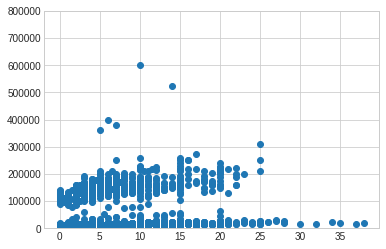

In [13]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

# Average salary based on years of experience
yoeFrame = (salaries.groupby(['Years of Experience', 'Base Salary'], as_index=False).mean().groupby('Years of Experience')['Base Salary'].mean().round().reset_index())
yoeFrame = yoeFrame.sort_values('Base Salary', ascending = False)
plt.scatter(salaries['Years of Experience'],salaries['Base Salary'])
plt.ylim(0,800000)
plt.show()

# The data projects that the highest average base salary comes from people with 22 years of experience for a salary of ~$285k. Meanwhile, workers with only 2 years of experience were projected to recieve ~$130k as a base salary, which is almost half the salary of someone with 22 years of experience. 
# The scatter plot created shows an upward trend. As years of experience increases, we can see that average base salary does as well.

In [14]:
# Average Salary based on company
companyFrame = (salaries.groupby(['Company', 'Base Salary'], as_index=False).mean().groupby('Company')['Base Salary'].mean().round().reset_index())
companyFrame = companyFrame.sort_values('Base Salary', ascending = False)
companyFrame.head()

# Squarespace has by far the largest average base salary of ~600k per year. Followed up is ey with only half that amount. Interestingly, the 5th highest average base salary from oracle oci is three times smaller than that of squarespace. 

,Company,Base Salary
41,netflix,164059.0
53,spotify,148333.0
5,amazon.com,90300.0
42,nvidia,84800.0
64,walmart labs,77020.0


In [15]:
# Analyze Salary by Gender
genderFrame = (salaries.groupby(['Gender', 'Base Salary'], as_index=False).mean().groupby('Gender')['Base Salary'].mean().round().reset_index())
genderFrame
# According to the data: On average, men's base salaries were almost twice as much as women's base salaries. However, The unspecified gender category could either skew the average base salary towards women or towards men.

,Gender,Base Salary
0,Female,62961.0
1,Male,73867.0
2,Other,16600.0


In [16]:
rankFrame = (salaries.groupby(['Level','Years of Experience'])[['Base Salary']]).mean()
rankFrame

Base Salary
Level                       Years of Experience               
amsterdam                   5.0                    7500.000000
amsterdam, netherlands      2.0                    8600.000000
                            3.0                    8300.000000
                            6.0                   80000.000000
amsterdam, nh, netherlands  2.0                    4400.000000
                            5.0                    8400.000000
                            6.0                   12000.000000
                            8.0                    6200.000000
                            9.0                    9000.000000
amsterdam, nl               3.0                    7000.000000
amsterdam, the netherlands  4.0                    7100.000000
atlanta                     0.0                    9000.000000
atlanta, ga                 6.0                   12000.000000
                            7.0                   11750.000000
                            8.0                   13200.000000
                            21.0                  28800.000000
austin                      1.0                    8500.000000
                            4.0                  158000.000000
                            7.0                   11000.000000
                            10.0                  14400.000000
                            16.0                  14000.000000
austin, tx                  0.0                   42666.666667
                            1.0                    8000.000000
                            2.0                   61250.000000
                            3.0                   10180.000000
                            4.0                   14400.000000
                            5.0                   12233.333333
                            6.0                   14100.000000
                            7.0                   12750.000000
                            8.0                   12000.000000
...                                                        ...
vancouver, bc, canada       7.0                  102200.000000
                            10.0                  13850.000000
                            11.0                 120000.000000
                            12.0                  12000.000000
vancouver, canada           15.0                  11500.000000
wa                          6.0                   22100.000000
                            20.0                  22500.000000
                            27.0                  30000.000000
waltham, ma                 10.0                  13100.000000
warsaw, mazowieckie, poland 5.0                    4500.000000
was                         5.0                   11900.000000
washington d.c              2.0                  116000.000000
washington d.c.             3.0                   10700.000000
washington, dc              0.0                   11000.000000
                            12.0                  16500.000000
                            15.0                  15500.000000
washington,dc               5.0                   13500.000000
waterloo, on, canada        0.0                    9200.000000
waterloo, ontario, canada   15.0                   9400.000000
winston salem, nc           25.0                  16300.000000
wisconsin                   7.0                   13800.000000
x                           7.0                   16100.000000
yekaterinburg               4.0                   25000.000000
yorktown heights, ny        0.0                   10500.000000
                            6.0                  147800.000000
zurich, switzerland         8.0                   15900.000000
zurich, zh, switzerland     7.0                   16500.000000
                            10.0                  16500.000000
                            12.0                  22000.000000
zürich, switzerland         2.0                   12800.000000

[1027 rows x 1 columns]

# Future and Conclusion 
Unfortunately this data set was extremely uncleanly, so a lot of data had to be replaced and removed
If I had more time I would have cleaned the location
